In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('Churn_Modelling.csv')
df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'Churn_Modelling.csv'

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [4]:
df.describe(include='all')

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000,10000.000000,10000,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
unique,NaN,NaN,2932,NaN,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Smith,NaN,France,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,32,NaN,5014,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5000.50000,1.569094e+07,NaN,650.528800,NaN,NaN,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,NaN,96.653299,NaN,NaN,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,NaN,350.000000,NaN,NaN,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,NaN,584.000000,NaN,NaN,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,NaN,652.000000,NaN,NaN,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,NaN,718.000000,NaN,NaN,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000


In [5]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [6]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [7]:
df=df.drop(['RowNumber', 'CustomerId', 'Surname'],axis=1)

In [8]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [9]:
df=pd.get_dummies(df,drop_first=True)

In [10]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False


In [11]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

<Axes: ylabel='count'>

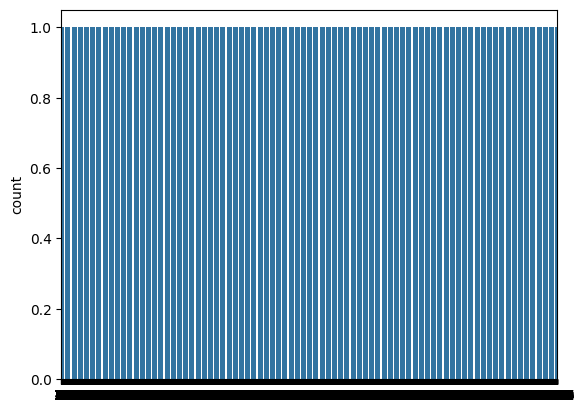

In [12]:
sns.countplot(df['Exited'])

In [13]:
x=df.drop('Exited',axis=1)
y=df['Exited']

In [14]:
from imblearn.over_sampling import SMOTE

In [15]:
x_res, y_res=SMOTE().fit_resample(x,y)

In [16]:
y_res.value_counts()

Exited
1    7963
0    7963
Name: count, dtype: int64

<Axes: ylabel='count'>

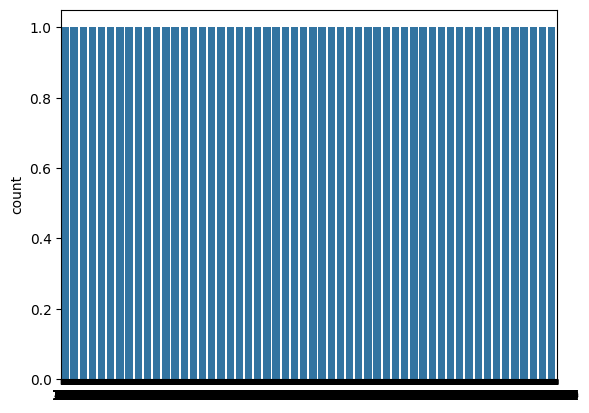

In [17]:
sns.countplot(y_res)

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x_res, y_res, test_size=0.2, random_state=42)

In [20]:
from sklearn.preprocessing import StandardScaler

In [21]:
sc=StandardScaler()

In [22]:
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [23]:
x_train

array([[ 1.13200878,  0.30379408, -1.39352259, ...,  1.32506086,
        -0.63915021,  0.81063431],
       [ 1.09929139,  0.1028055 , -1.39352259, ..., -0.75468232,
        -0.63915021,  0.81063431],
       [ 0.12867555, -0.29917166, -0.28977091, ..., -0.75468232,
        -0.63915021,  0.81063431],
       ...,
       [ 0.20501612,  0.20329979,  1.18189799, ..., -0.75468232,
        -0.63915021,  0.81063431],
       [ 0.82664649,  0.40428837,  0.81398076, ...,  1.32506086,
         1.56457744,  0.81063431],
       [ 0.53219   ,  1.00725411, -1.39352259, ...,  1.32506086,
        -0.63915021,  0.81063431]], shape=(12740, 11))

In [24]:
from sklearn.linear_model import LogisticRegression

In [25]:
log=LogisticRegression()

In [26]:
log.fit(x_train,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [27]:
y_pred1=log.predict(x_test)

In [28]:
from sklearn.metrics import accuracy_score

In [29]:
accuracy_score(y_test,y_pred1)

0.7752667922159447

In [30]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [31]:
precision_score(y_test,y_pred1)

0.766390833863781

In [34]:
recall_score(y_test,y_pred1)

0.7752736638763683

In [35]:
f1_score(y_test,y_pred1)

0.7708066581306018

In [36]:
from sklearn import svm

In [37]:
svm=svm.SVC()

In [38]:
svm.fit(x_train,y_train)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [39]:
y_pred2=svm.predict(x_test)

In [40]:
accuracy_score(y_test,y_pred2)

0.842435655994978

In [41]:
precision_score(y_test,y_pred2)

0.8423452768729641

In [42]:
recall_score(y_test,y_pred2)

0.8325820991629105

In [43]:
f1_score(y_test,y_pred2)

0.8374352331606217

In [44]:
from sklearn.neighbors import KNeighborsClassifier

In [45]:
knn=KNeighborsClassifier()

In [46]:
knn.fit(x_train,y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [47]:
y_pred3=knn.predict(x_test)

In [48]:
accuracy_score(y_test,y_pred3)

0.82015065913371

In [49]:
precision_score(y_test,y_pred3)

0.8032178217821783

In [50]:
recall_score(y_test,y_pred3)

0.8358016741790084

In [51]:
f1_score(y_test,y_pred3)

0.8191858630482802

In [52]:
from sklearn.tree import DecisionTreeClassifier

In [53]:
dt=DecisionTreeClassifier()

In [54]:
dt.fit(x_train,y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [55]:
y_pred4=dt.predict(x_test)

In [56]:
accuracy_score(y_test,y_pred4)

0.8041431261770244

In [57]:
precision_score(y_test,y_pred4)

0.7779772591262717

In [58]:
recall_score(y_test,y_pred4)

0.8370895041854475

In [59]:
f1_score(y_test,y_pred4)

0.8064516129032258

In [60]:
from sklearn.ensemble import RandomForestClassifier

In [61]:
rf=RandomForestClassifier()

In [62]:
rf.fit(x_train,y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [63]:
y_pred5=rf.predict(x_test)

In [64]:
accuracy_score(y_test,y_pred5)

0.8691148775894538

In [65]:
precision_score(y_test,y_pred5)

0.8622448979591837

In [66]:
recall_score(y_test,y_pred5)

0.8705730843528654

In [67]:
f1_score(y_test,y_pred5)

0.8663889778917013

In [68]:
from sklearn.ensemble import GradientBoostingClassifier

In [69]:
gbc=GradientBoostingClassifier()

In [70]:
gbc.fit(x_train,y_train)

,loss,'log_loss'
,learning_rate,0.1
,n_estimators,100
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,3
,min_impurity_decrease,0.0
,init,None


In [71]:
y_pred6=gbc.predict(x_test)

In [72]:
accuracy_score(y_test,y_pred6)

0.8389830508474576

In [73]:
precision_score(y_test,y_pred6)

0.839425587467363

In [74]:
recall_score(y_test,y_pred6)

0.8280746941403735

In [75]:
f1_score(y_test,y_pred6)

0.833711507293355

In [80]:
import xgboost  as xgb

model_xgb=xgb.XGBClassifier(random_state=42,verbosity=0)
model_xgb.fit(x_train,y_train)

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [81]:
y_pred7=model_xgb.predict(x_test)

In [82]:
accuracy_score(y_test,y_pred7)

0.8659761456371626

In [83]:
precision_score(y_test,y_pred7)

0.8618251928020566

In [84]:
recall_score(y_test,y_pred7)

0.8634900193174501

In [85]:
f1_score(y_test,y_pred7)

0.8626568028304921

In [86]:
performance_summary=pd.DataFrame({
    'Model':['LR','SVC','KNN','DT ','RF','GBC','XGB'],
    'ACC':[accuracy_score(y_test,y_pred1),
           accuracy_score(y_test,y_pred2),
           accuracy_score(y_test,y_pred3),
           accuracy_score(y_test,y_pred4),
           accuracy_score(y_test,y_pred5),
           accuracy_score(y_test,y_pred6),
           accuracy_score(y_test,y_pred7),
          ]
})

In [87]:
performance_summary

,Model,ACC
0,LR,0.775267
1,SVC,0.842436
2,KNN,0.820151
3,DT,0.804143
4,RF,0.869115
5,GBC,0.838983
6,XGB,0.865976


<Axes: xlabel='Model', ylabel='ACC'>

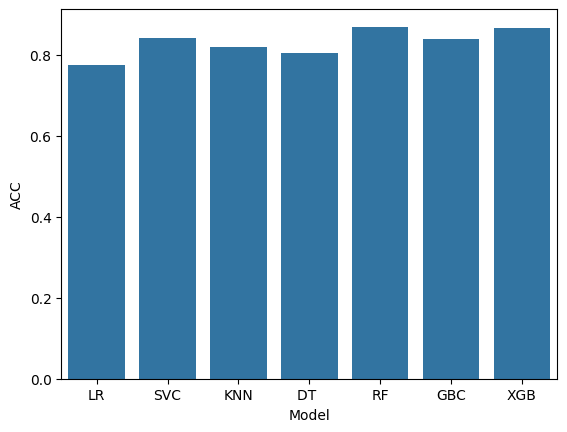

In [88]:
sns.barplot(x='Model', y='ACC', data=performance_summary)

In [89]:
performance_summary=pd.DataFrame({
    'Model':['LR','SVC','KNN','DT ','RF','GBC','XGB'],
    'PRECISION':[precision_score(y_test,y_pred1),
           precision_score(y_test,y_pred2),
           precision_score(y_test,y_pred3),
           precision_score(y_test,y_pred4),
           precision_score(y_test,y_pred5),
           precision_score(y_test,y_pred6),
           precision_score(y_test,y_pred7),
          ]
})

In [90]:
performance_summary

,Model,PRECISION
0,LR,0.766391
1,SVC,0.842345
2,KNN,0.803218
3,DT,0.777977
4,RF,0.862245
5,GBC,0.839426
6,XGB,0.861825


<Axes: xlabel='Model', ylabel='PRECISION'>

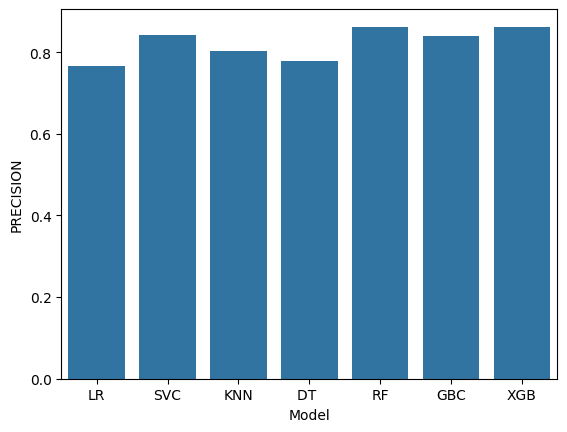

In [91]:
sns.barplot(x='Model', y='PRECISION', data=performance_summary)

In [92]:
x_train=sc.fit_transform(x_train)

In [93]:
model_xgb.fit(x_res,y_res)

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [94]:
import joblib

In [95]:
joblib.dump(model_xgb,'churn_predict_model')

['churn_predict_model']

In [96]:
model = joblib.load('churn_predict_model')

In [97]:
df.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Geography_Germany',
       'Geography_Spain', 'Gender_Male'],
      dtype='object')